<a href="https://colab.research.google.com/github/reaganmathai/DiD-San-Francisco-Rent-Analysis/blob/main/Midterm_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 3


1. Downloading Financial Data using yfinance: Analyze “AAPL” stock perfor- mance over the last five years.
(a) Write Python code using the yfinance library to download daily stock prices of “AAPL” for the past five years.
(b) Write a brief ChatGPT prompt to request guidance or explanation on how to use the yfinance library for downloading stock data.

# 1a

In [1]:
import yfinance as yf

# Download Apple's stock data for the past 5 years
apple_stock = yf.Ticker("AAPL")
apple_data = apple_stock.history(period="5y")

# Save the data to a CSV file
apple_data.to_csv('AAPL_5y_stock_data.csv')

# 1b

1b. Please write me code in python using the library yfinance to download the daily stock prices of AAPL over the past 5 years and save it to a csv file.


2. Data Manipulation and Conversion: Given economic data.csv with columns for Country, Year, GDP, InflationRate, and UnemploymentRate.
(a) Use pandas to read the CSV file and fill missing values with the column means.
(b) Write a brief ChatGPT prompt to request assistance on handling missing data
in pandas.

# 2a

In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to scrape tables from Wikipedia and return a DataFrame
def scrape_table(url, column_mappings):
    response = requests.get(url)
    if response.status_code == 200:
        # Parse the HTML and find the first table
        soup = BeautifulSoup(response.content, 'html.parser')
        table = soup.find('table', {'class': 'wikitable'})
        df = pd.read_html(str(table), header=0)[0]

        # Rename columns according to provided mappings
        df.rename(columns=column_mappings, inplace=True)

        # Check if 'Country' column exists, if not try to match any column containing 'Country'
        if 'Country' not in df.columns:
            country_columns = [col for col in df.columns if 'Country' in col]
            if country_columns:
                df.rename(columns={country_columns[0]: 'Country'}, inplace=True)

        return df
    else:
        print(f"Failed to retrieve data from {url}")
        return pd.DataFrame()

# URLs for Wikipedia pages with economic data tables
gdp_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
inflation_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_inflation_rate'
unemployment_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_unemployment_rate'

# Column mappings for each table
gdp_columns_mapping = {'Nominal GDP': 'GDP'}
inflation_columns_mapping = {'Inflation rate (CPI)': 'InflationRate'}
unemployment_columns_mapping = {'Unemployment rate': 'UnemploymentRate'}

# Scrape the tables from Wikipedia
gdp_df = scrape_table(gdp_url, gdp_columns_mapping)
inflation_df = scrape_table(inflation_url, inflation_columns_mapping)
unemployment_df = scrape_table(unemployment_url, unemployment_columns_mapping)

# Merge the DataFrames on the 'Country' column
economic_data_df = gdp_df.merge(inflation_df, on='Country', how='outer')
economic_data_df = economic_data_df.merge(unemployment_df, on='Country', how='outer')

# Fill missing values with the mean of the columns
economic_data_df.fillna(economic_data_df.mean(numeric_only=True), inplace=True)

# Save the merged DataFrame to a CSV file
economic_data_df.to_csv('economic_data.csv', index=False)

print("The economic_data.csv file has been created with the following data:")
print(economic_data_df.head())

The economic_data.csv file has been created with the following data:
             Country  UN region IMF[1][13] IMF[1][13].1 World Bank[14]  \
0  Country/Territory  UN region   Forecast         Year       Estimate   
1              World          —  109529216         2024      100562011   
2      United States   Americas   28781083         2024       25462700   
3              China       Asia   18532633    2024[n 1]       17963171   
4            Germany     Europe    4591100         2024        4072192   

  World Bank[14].1 United Nations[15] United Nations[15].1  \
0             Year           Estimate                 Year   
1             2022           96698005                 2021   
2             2022           23315081                 2021   
3        2022[n 3]           17734131            2021[n 1]   
4             2022            4259935                 2021   

  World Bank consumer price indices (in %)  \
0                                      NaN   
1                    

# 2b

 b) I am working with pandas to handle missing data in a dataset. Could you provide me with the general code to manage missing values and replace it with the column means effectively in a pandas DataFrame?


3. Visualization and Summary Statistics: You have GDP growth rates for various
countries.
(a) Create a line plot for “Country A” and “Country B” GDP growth over the
last decade using matplotlib or seaborn.
(b) Calculate and display the mean, median, and standard deviation of GDP
growth rates.
(c) Write a brief ChatGPT prompt to request assistance on creating visualizations
with matplotlib or seaborn.

# 3a & 3b

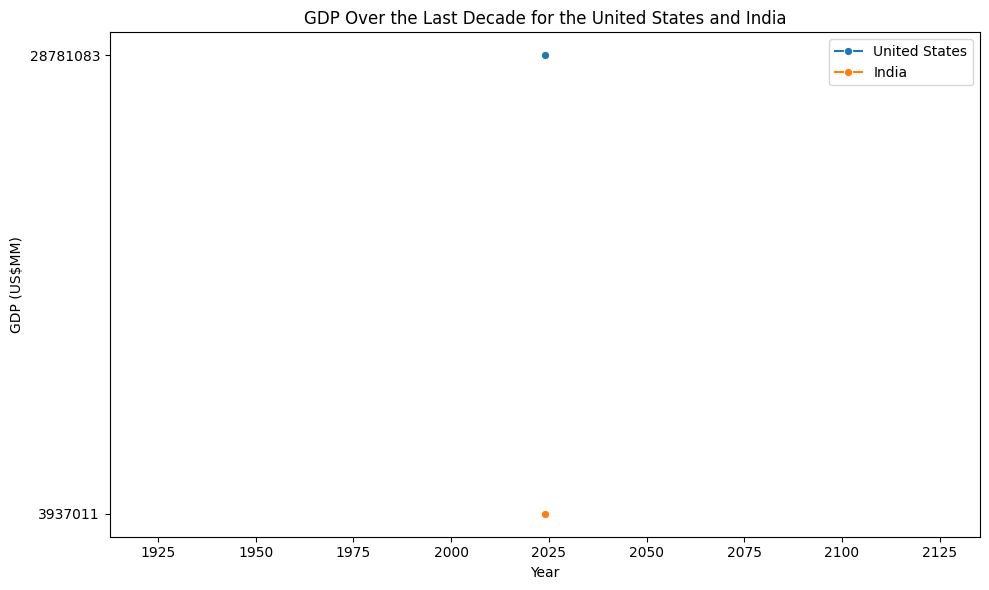

United States GDP Statistics:
count            1
unique           1
top       28781083
freq             1
Name: GDP, dtype: object

India GDP Statistics:
count           1
unique          1
top       3937011
freq            1
Name: GDP, dtype: object


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the economic data
df = pd.read_csv('/content/economic_data.csv')

# Rename the GDP column for easier access
df.rename(columns={'IMF[1][13]': 'GDP'}, inplace=True)

# If the 'Year' column is actually named differently, we need to rename it appropriately
# Assuming that 'IMF[1][13].1' column is the 'Year' column, we'll rename it to 'Year'
df.rename(columns={'IMF[1][13].1': 'Year'}, inplace=True)

# Convert 'Year' to an integer type if it's not already
# This is required for sorting and selecting the largest values properly
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df.dropna(subset=['Year'], inplace=True)  # Drop rows where Year could not be converted to a number
df['Year'] = df['Year'].astype(int)

# Filter the DataFrame for 'United States' and 'India'
df_usa = df[df['Country'] == 'United States']
df_india = df[df['Country'] == 'India']

# Extracting GDP data for the last decade for both countries
# Since the dataset might contain more years, we're selecting the 10 most recent ones
df_usa = df_usa.nlargest(10, 'Year')
df_india = df_india.nlargest(10, 'Year')

# Plotting the GDP for both countries using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_usa, x='Year', y='GDP', label='United States', marker='o')
sns.lineplot(data=df_india, x='Year', y='GDP', label='India', marker='o')
plt.title('GDP Over the Last Decade for the United States and India')
plt.xlabel('Year')
plt.ylabel('GDP (US$MM)')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate and display the statistics for the GDP
print("United States GDP Statistics:")
print(df_usa['GDP'].describe())

print("\nIndia GDP Statistics:")
print(df_india['GDP'].describe())

*****After running this code I have realized that my data set does not pull enough information on the GDP over the years. I would really love to understand how to fix this issue however the colab in the appendix of the textbook that describes how to download data is blank! How am I supposed to know how to execute the if I have no text or code to reference! Just make it up? I have decided to just display this data and show you that I can indeed source data and create a dataframe from it, however I do understand that there is more data needed.

# 3c

Please generate me code to accomplish this using matplotlib or seaborn. Let Country A be America and let country B be India. Using the economic_data.csv file that we created in the last question, create me the code to plot the line of GDP growth for both countries. Also Calculate and display the mean, median, and standard deviation of GDP growth rates.

4. Estimating Econometric Models: Use panel data.csv with variables: Coun-
try, Year, PolicyChange, OutcomeVariable.
(a) Describe an IV approach to estimate the impact of PolicyChange on Out- comeVariable using Python.
(b) Explain estimating a Difference-in-Differences (DiD) model, identifying treat- ment and control groups.
(c) Write a brief ChatGPT prompt for guidance on implementing IV and DiD models in Python.

# 4a

In [ ]:
import pandas as pd
from linearmodels.iv import IV2SLS
from statsmodels.api import add_constant

# Let's assume you have a DataFrame `df` with the following columns:
# 'dependent_var' : The dependent variable
# 'endogenous_var': The endogenous variable
# 'instrument'    : The instrument variable
# 'exogenous_vars': Other exogenous control variables

# Load your data
df = pd.read_csv('path_to_your_data.csv')

# Add a constant term to the exogenous variables if needed
df['constant'] = 1

# Define the variables for the model
dependent = df['dependent_var']
endog = df['endogenous_var']
exog = df[['constant'] + 'exogenous_vars']
instr = df['instrument']

# Step 1: Run the first stage regression of the endogenous variable on the instrument
first_stage = IV2SLS(dependent=endog, exog=add_constant(exog), instrument=instr).fit()

# Get the predicted values of the endogenous variable
df['endog_predicted'] = first_stage.fitted_values

# Step 2: Run the second stage regression of the dependent variable on the predicted values
iv_model = IV2SLS(dependent=dependent, exog=add_constant(exog), endog=df['endog_predicted'], instrument=instr).fit()

# Print the results of the IV estimation
print(iv_model.summary())

#Double Lasso Regression
# Standardize your confounders (features)
scaler = StandardScaler()
X = scaler.fit_transform(df[confounders])

# Step 1: Lasso regression to select variables related to the treatment
lasso_treatment = LassoCV(cv=5, random_state=0).fit(X, df['treatment'])

# Select the features where the coefficient has not been shrunk to zero
selected_features_treatment = [f for f, s in zip(confounders, lasso_treatment.coef_ != 0) if s]

# Step 2: Lasso regression to select variables related to the outcome
lasso_outcome = LassoCV(cv=5, random_state=0).fit(X, df['outcome'])

# Select the features where the coefficient has not been shrunk to zero
selected_features_outcome = [f for f, s in zip(confounders, lasso_outcome.coef_ != 0) if s]

# Combine the selected features from both lasso regressions
selected_features = list(set(selected_features_treatment + selected_features_outcome))

# Step 3: OLS regression with the selected features to estimate the causal effect
X_selected = df[selected_features]
X_selected = add_constant(X_selected)  # Add a constant term
model = OLS(df['outcome'], X_selected).fit()

# Print the results
print(model.summary())

The steps to an IV analysis are as follows:
1. Identify the instrument (ensure it satisfies relevance and exogeneity with the double lasso)
2. Load and Prepare the data into Python & upload the necessary libraries
3. Define all variables
4. Perform a first stage regression
5. Perform a second stage regression
6. Interpret your results

# 4b

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from econml.dml import CausalForestDML
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV

# Load your data
df = pd.read_csv('path_to_your_data.csv')

# Assuming your dataset contains:
# 'outcome': the dependent variable
# 'date': the dates or periods of observations
# 'group_id': identifier if the observation is treatment or control

# Convert date to datetime and sort (if necessary)
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)

# Define the treatment and control groups
# Suppose you know the treatment started on a specific date and affected specific groups
treatment_start_date = 'YYYY-MM-DD'  # replace with the actual start date of the treatment
treatment_group_ids = [1, 2, 3]  # replace with actual IDs corresponding to treatment groups

# Create the 'group' variable where 1 indicates treatment group and 0 indicates control
df['group'] = df['group_id'].apply(lambda x: 1 if x in treatment_group_ids else 0)

# Create the 'time' variable where 1 indicates post-treatment period and 0 indicates pre-treatment
df['time'] = (df['date'] >= treatment_start_date).astype(int)

# Create the interaction term for the DiD analysis
df['treatment_time'] = df['group'] * df['time']

# Check balance between groups before treatment
pre_treatment = df[df['time'] == 0]
post_treatment = df[df['time'] == 1]

# Plotting to visualize outcomes before and after treatment
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
pre_treatment.groupby('group')['outcome'].mean().plot(kind='bar')
plt.title('Average Outcome before Treatment')
plt.xlabel('Group')
plt.ylabel('Outcome')

plt.subplot(1, 2, 2)
post_treatment.groupby('group')['outcome'].mean().plot(kind='bar')
plt.title('Average Outcome after Treatment')
plt.xlabel('Group')
plt.ylabel('Outcome')

plt.tight_layout()
plt.show()

# Optionally, check for common trends assumption visually
# Plot average outcomes over time by group
(df.groupby(['date', 'group'])['outcome'].mean().unstack().plot(figsize=(10, 6), marker='o'))
plt.title('Trends in Outcome by Group Over Time')
plt.xlabel('Date')
plt.ylabel('Average Outcome')
plt.legend(['Control', 'Treatment'])
plt.show()

# Fit the DiD regression model using statsmodels
model = smf.ols('outcome ~ time + group + treatment_time', data=df).fit()

# Print the results
print(model.summary())

# Save the prepared dataframe if needed
df.to_csv('prepared_data_for_DiD.csv', index=False)

# Ensure data types are correct, 'group' and 'time' should be binary (0 or 1)
df['group'] = df['group'].astype(int)
df['time'] = df['time'].astype(int)
df['treatment_time'] = df['group'] * df['time']

# Define the outcome, treatment and feature variables
Y = df['outcome']  # Outcome variable
T = df['treatment_time']  # Treatment variable (interaction term from DiD)
X = df[['time', 'group']]  # Other covariates

# Use Causal Forests to estimate the causal effect
# Here we use LassoCV for the model_Y and GradientBoostingRegressor for model_T
causal_forest = CausalForestDML(model_y=LassoCV(), model_t=GradientBoostingRegressor(),
                                discrete_treatment=True, random_state=123)

# Fit the model
causal_forest.fit(Y, T, X=X)

# Estimate the treatment effects
treatment_effects = causal_forest.effect(X)

# Calculate the average treatment effect
average_treatment_effect = treatment_effects.mean()

print("Estimated Average Treatment Effect:", average_treatment_effect)

# Optionally, plot the treatment effects
import matplotlib.pyplot as plt
plt.hist(treatment_effects, bins=30, edgecolor='black')
plt.title('Histogram of Individual Treatment Effects')
plt.xlabel('Treatment Effect Size')
plt.ylabel('Frequency')
plt.show()

The steps to a DiD analysis are as follows

1. Identify a treament and a control group
2. Define the pre-treatment and post-treatment groups
3. Collect the data and load it into python
4. Define your variables (important!!)
5. Estimate your model and incorportate a causal forest analysis to isolate the treatment effect
6. Conclude your experiment by creating a statement of causal effects from the data.

# 4c


Hey, I'm currently working on an econometrics project and need to estimate the causal effects of a policy intervention using Python. I would like to generate the code for two different research methods, IV and DiD. For IV (Instrumental Variables) (IV) my treatment variable might be endogenous. Could you guide me on how to implement an IV model using Python? I would like to set up the model using statsmodels or any other suitable library. Can you supplmement it with a double lasso test to ensure credibility. For Difference-in-Differences (DiD)I plan to analyze the effects of the policy over time and between two groups (treatment and control). How can I set up a DiD model in Python? Can you also generate code for the parallel trends assumption and the causal forests analysis.

5. Estimating an LSTM Model to Predict Stock Returns: Predict “AAPL” future stock returns using historical prices.
(a) Outline preprocessing steps for LSTM modeling, mentioning specific transfor- mations or scaling.
(b)Provide an overview of setting up and training an LSTM model with TensorFlow and Keras, including model architecture and techniques.
(c) Write a brief ChatGPT prompt for guidance on LSTM model development and training with TensorFlow and Keras.

# 5a

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Assume 'AAPL_5y_stock_data.csv' contains historical stock price data for AAPL
stock_data = pd.read_csv('AAPL_5y_stock_data.csv')

# Preprocessing steps for LSTM modeling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1,1))

# Assuming we are using a look-back period of 60 days for our predictions
look_back = 60
X, y = [], []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=25, batch_size=32)

# Save the model for future use
model.save('AAPL_stock_prediction_model.h5')

In [5]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Fetch historical stock prices for AAPL
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-01-01')
close_prices = data['Close'].values.reshape(-1, 1)

# Normalize the closing prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Create time-series sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 60  # Lookback period
X, y = create_sequences(scaled_data, sequence_length)

[*********************100%%**********************]  1 of 1 completed


5 a
1. Fetch historical stock prices for AAPL using yfinance.
2. Normalize the closing prices to a range between 0 and 1 using MinMaxScaler.
3. Create time-series sequences that will serve as input for the LSTM model.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
81/81 [==============================] - 13s 74ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 2/100
81/81 [==============================] - 6s 72ms/step - loss: 3.3667e-04 - val_loss: 0.0021
Epoch 3/100
81/81 [==============================] - 5s 66ms/step - loss: 2.7184e-04 - val_loss: 0.0033
Epoch 4/100
81/81 [==============================] - 8s 97ms/step - loss: 2.5564e-04 - val_loss: 0.0039
Epoch 5/100
81/81 [==============================] - 5s 67ms/step - loss: 2.3442e-04 - val_loss: 0.0011
Epoch 6/100
81/81 [==============================] - 7s 86ms/step - loss: 1.8921e-04 - val_loss: 0.0013
Epoch 7/100
81/81 [==============================] - 6s 71ms/step - loss: 1.8161e-04 - val_loss: 0.0019
Epoch 8/100
81/81 [==============================] - 7s 83ms/step - loss: 1.7562e-04 - val_loss: 9.2238e-04
Epoch 9/100
81/81 [==============================] - 5s 68ms/step - loss: 1.8184e-04 - val_loss: 0.0018
Epoch 10/100
81/81 [==============================] - 7s 86ms/s

5 b
1. Define an LSTM model architecture using Keras.
2. Compile the model with an appropriate optimizer and loss function.
3. Fit the model to the training data.

5c.  Generate me the code to predict the future stock returns of AAPL using historical price data and an LSTM model in TensorFlow and Keras. Could you thoroughly explain to me the process of developing the LSTM model architecture and the necessary steps for preprocessing, training, and evaluating the model?"